<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/0317_SG_%EC%A7%80%EC%97%B0%EC%9C%A8_%EC%8B%A0%EA%B7%9C%EA%B3%A0%EA%B0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

In [3]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

# Data load

In [9]:
kurly = pd.read_csv("kurly.csv")
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday


In [80]:
# 날짜데이터들 형식 변경
kurly['Date'] = pd.to_datetime(kurly['Date'])
kurly['DeliveryDT'] = pd.to_datetime(kurly['DeliveryDT'])
kurly['OrderDT'] = pd.to_datetime(kurly['OrderDT'])

kurly['Date_Delivery'] = pd.to_datetime(kurly['DeliveryDT'].dt.strftime('%Y-%m-%d')) # 도착날짜 연-월-일 형식으로 추가
kurly['Delivery_diff_Order'] = kurly['Date_Delivery'] - kurly['Date'] # 도착날짜 - 주문날짜(days)
kurly[['OrderDT', 'DeliveryDT', 'Delivery_diff_Order']].head()

,OrderDT,DeliveryDT,Delivery_diff_Order
0,2021-12-03 20:59:27,2021-12-04 03:26:00+00:00,1 days
1,2021-12-03 20:59:27,2021-12-04 03:26:00+00:00,1 days
2,2021-12-03 20:59:27,2021-12-04 03:26:00+00:00,1 days
3,2021-12-03 20:59:27,2021-12-04 03:26:00+00:00,1 days
4,2021-12-03 20:59:27,2021-12-04 03:26:00+00:00,1 days


In [92]:
# 배송 요일 추가
# 요일 추출 (월요일=0, 일요일=6)
kurly['Weekday_Delivery'] = kurly['DeliveryDT'].dt.weekday
# 숫자 요일을 문자열 요일로 매핑
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
kurly['WeekdayName_Delivery'] = kurly['Weekday_Delivery'].map(weekday_map)
# order_user = order_user.drop(columns='Weekday')

kurly[['DeliveryDT','WeekdayName_Delivery']]

,DeliveryDT,WeekdayName_Delivery
0,2021-12-04 03:26:00+00:00,Saturday
1,2021-12-04 03:26:00+00:00,Saturday
2,2021-12-04 03:26:00+00:00,Saturday
3,2021-12-04 03:26:00+00:00,Saturday
4,2021-12-04 03:26:00+00:00,Saturday
...,...,...
1018706,2023-04-12 04:36:00+00:00,Wednesday
1018707,2023-04-12 04:36:00+00:00,Wednesday
1018708,2023-04-12 04:36:00+00:00,Wednesday
1018709,2023-04-12 04:36:00+00:00,Wednesday


## 요일별 배송지연율

In [98]:
grouped_data = kurly.groupby('WeekdayName_Delivery')['Delay_YN'].value_counts(normalize=True).rename("percentage").reset_index()
grouped_data.sort_values(by=['percentage'])

,WeekdayName_Delivery,Delay_YN,percentage
5,Saturday,1,0.034701
11,Wednesday,1,0.039852
3,Monday,1,0.041396
1,Friday,1,0.041583
7,Thursday,1,0.043329
9,Tuesday,1,0.043547
8,Tuesday,0,0.956453
6,Thursday,0,0.956671
0,Friday,0,0.958417
2,Monday,0,0.958604


|   |월|화|수|목|금|토|
|---|---|---|---|---|---|---|
|배송지연율(%)|4.14|4.36|3.99|4.33|4.16|3.47|

- 토요일의 배송지연율이 낮다(약 3.47%)
- 평균(4.1%) 대비 84% 수준
- 화요일(4.36%) 대비 80% 수준
- 원인??


In [118]:
# 요일별 매출
weekday_q = kurly.groupby('WeekdayName')['idOrder'].count().reset_index()
weekday_q

,WeekdayName,idOrder
0,Friday,126732
1,Monday,143335
2,Saturday,9539
3,Sunday,219884
4,Thursday,177005
5,Tuesday,158020
6,Wednesday,184196


<Axes: xlabel='WeekdayName', ylabel='idOrder'>

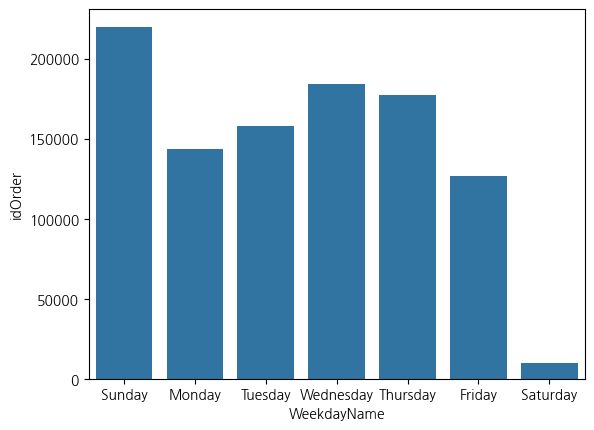

In [120]:
sns.barplot(data=weekday_q, x='WeekdayName', y='idOrder',
             order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

- 도착 전 날 매출과는 크게 관련 없는 듯

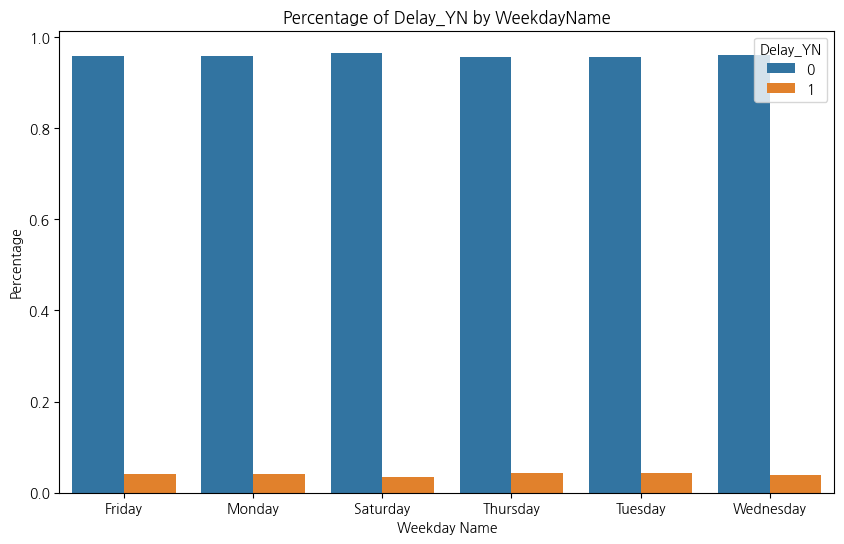

In [103]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="WeekdayName_Delivery", y="percentage", hue="Delay_YN", data=grouped_data)
plt.title("Percentage of Delay_YN by WeekdayName")
plt.ylabel("Percentage")
plt.xlabel("Weekday Name")

plt.show()

## 주문시간별 배송지연율

In [104]:
Hour_delay = kurly.groupby('Hour')['Delay_YN'].mean().reset_index()
Hour_delay.head()

,Hour,Delay_YN
0,0,0.036010
1,1,0.033152
2,2,0.024434
3,3,0.048292
4,4,0.034146


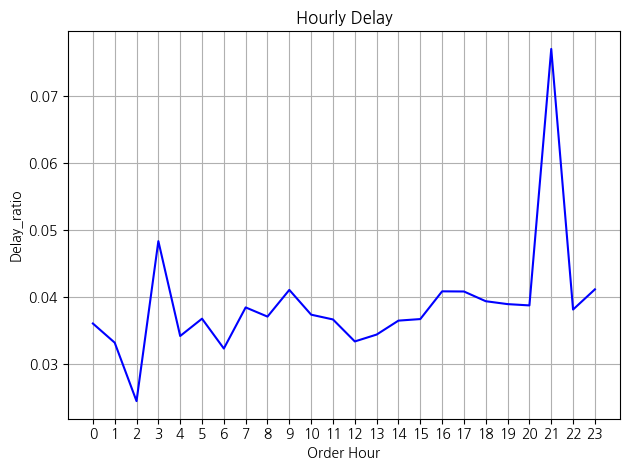

In [105]:
# 그래프 그리기
plt.plot(Hour_delay['Hour'], Hour_delay['Delay_YN'], color='b', linestyle='-')
# 그래프 제목과 축 레이블
plt.title('Hourly Delay')
plt.xlabel('Order Hour')
plt.ylabel('Delay_ratio')
# 그래프 보여주기
plt.grid(True)
plt.xticks(range(24))  # x축 눈금을 시간대로 설정
plt.tight_layout()
plt.show()

- 21~22시 주문할 경우 배송지연율이 약 7.7 %로 타 시간대보다 매우 높음
- 왜?


In [31]:
# Delivery_hour 추가
kurly['Delivery_Hour'] = kurly['DeliveryDT'].dt.hour
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Delivery_Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday,3
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday,3
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday,3
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday,3
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday,3


Text(0.5, 1.0, '21~22시 주문시 도착시간')

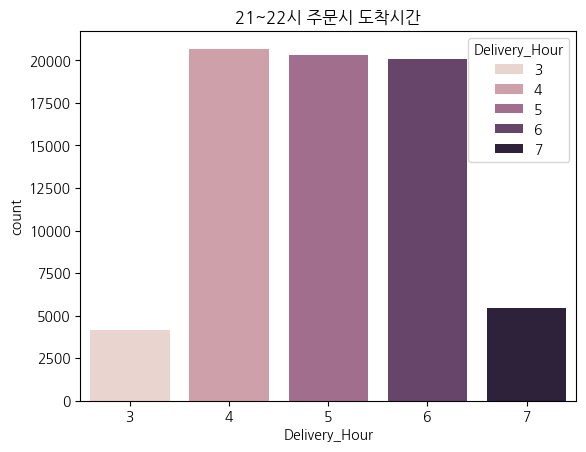

In [72]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_Hour', hue = 'Delivery_Hour')
plt.title("21~22시 주문시 도착시간")

Text(0.5, 1.0, '21~22시 주문시 도착까지 걸리는 일 수')

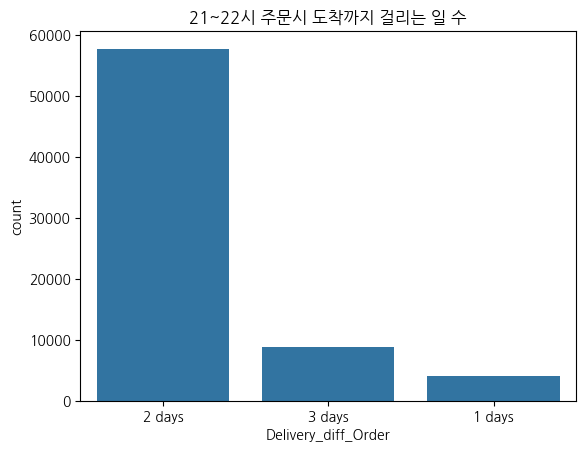

In [111]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order')
plt.title("21~22시 주문시 도착까지 걸리는 일 수")

In [75]:
# 21시 ~ 22시 주문시 도착까지 걸리는 일 수 비율
kurly_order_21['Delivery_diff_Order'].value_counts(normalize = True)

2 days    0.817115
3 days    0.125233
1 days    0.057652
Name: Delivery_diff_Order, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 2일 걸린 경우의 배송 수')

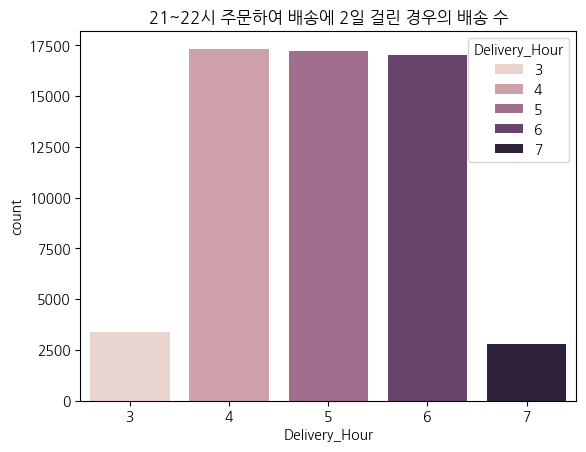

In [108]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율 plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 2일 걸린 경우의 배송 수")

In [64]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days']['Delivery_Hour'].value_counts(normalize=True)

4    0.300087
5    0.298494
6    0.294842
3    0.058421
7    0.048156
Name: Delivery_Hour, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 1일 걸린 경우의 배송 수')

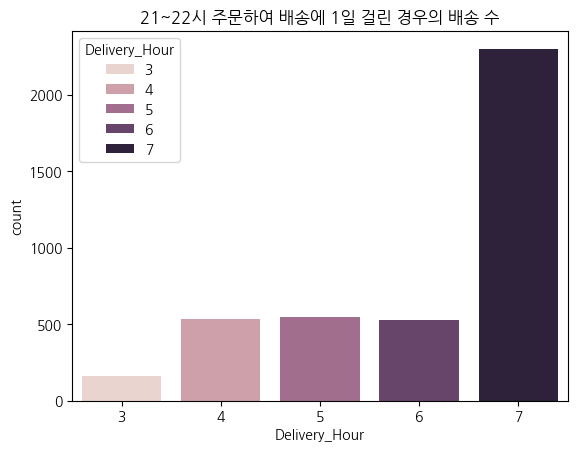

In [109]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터) plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 1일 걸린 경우의 배송 수")

In [66]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터)
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days']['Delivery_Hour'].value_counts(normalize=True)

7    0.565015
5    0.133955
4    0.131011
6    0.129784
3    0.040236
Name: Delivery_Hour, dtype: float64

    - 21시~22시에 주문한 경우
        - 배송에 2일이 걸릴 때 배송지연율은 약 4.8%
        - 배송에 1일이 걸릴 때 배송지연율은 약 57%
    - 21시~22시에 주문하여 바로 다음 날 배송을 하려할 때 배송 지연이 굉장히 많다.

Text(0.5, 1.0, '22시 이후 주문시 도착까지 걸리는 일 수')

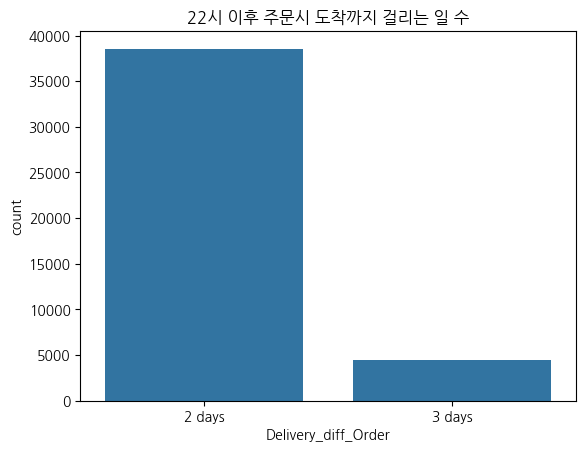

In [71]:
# 22시 이후 주문 중 바로 다음날 배송해준 건수
kurly_order_after22 = kurly[kurly['Hour']==22 | 23]
sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order')
plt.title("22시 이후 주문시 도착까지 걸리는 일 수")

- 22시 이후 주문한 경우 모두 2일 이후 배송

- 정리
    1. 21시 ~ 22시에 주문한 경우 배송지연율 높다(약 7.7%).
    2. 우리 회사는 21시 전 주문 건만 익일새벽배송이 원칙.
    3. 21시 ~ 22시에 주문한 것 중 익일새벽배송이 존재(약 5.8%)
    4. 21시 ~ 22시에 주문한 것이 익일새벽배송일 때 배송지연율이 높음(약 57%)
    5. 21시 이후 주문에 대하여 익일새벽배송을 하려고 할 때의 프로세스 개선이 필요

In [83]:
kurly['CleanedItemName'].head()

0                        이츠웰 후르츠칵테일 과일통조림 3k 슬라이스
1             베지가든 수제교자만두 매콤한 김치맛 720g  360gx2개입 
2             매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉
3                계양구 배달  싱싱한 방울토마토 750g  작전 과일나라 
4    낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지  양념소스70gx1팩 제공 
Name: CleanedItemName, dtype: object

## 시간대별 도착건수

In [84]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Delivery_Hour,Delivery_diff_Order,Date_Delivery,Weekday_Delivery,WeekdayName_Delivery
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00+00:00,0,L1,가공식품,M12,...,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00+00:00,0,L1,가공식품,M15,...,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00+00:00,0,L1,가공식품,M23,...,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00+00:00,0,L4,신선식품,M12,...,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00+00:00,0,L4,신선식품,M17,...,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Friday


In [130]:
kurly['DeliveryHM'] = kurly['DeliveryDT'].apply(lambda x: x.strftime('%H:%M'))

In [131]:
delivery_time = kurly.groupby('DeliveryHM')['idOrder'].count().reset_index()

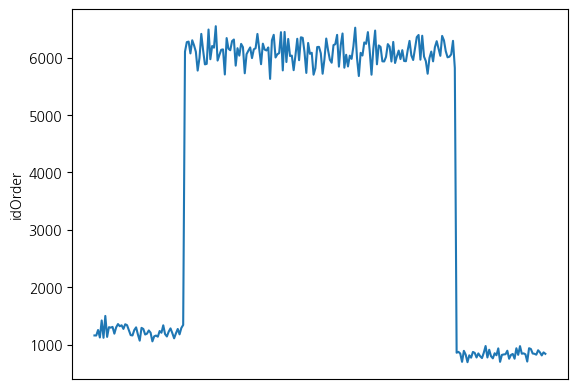

In [158]:
sns.lineplot(data = delivery_time, x = 'DeliveryHM', y='idOrder')
plt.gca().axes.xaxis.set_visible(False)

In [137]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,TimeBetweenOrders,Combined,Weekday,WeekdayName,Delivery_Hour,Delivery_diff_Order,Date_Delivery,Weekday_Delivery,WeekdayName_Delivery,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00+00:00,0,L1,가공식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Saturday,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00+00:00,0,L1,가공식품,M15,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Saturday,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00+00:00,0,L1,가공식품,M23,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Saturday,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00+00:00,0,L4,신선식품,M12,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Saturday,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00+00:00,0,L4,신선식품,M17,...,3 days 09:06:40,"20s, 여성, 2",4,Friday,3,1 days,2021-12-04,5,Saturday,03:26


## 신규고객

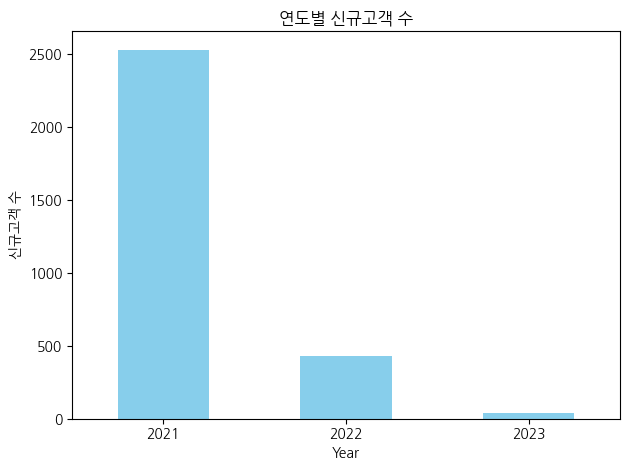

In [148]:
### 신규고객 수 그래프
first_order = kurly[['idUser','OrderDT','Year']].sort_values(['idUser','OrderDT'])
first_order.drop_duplicates('idUser', inplace = True)
# Year 별로 idUser의 수를 계산
user_count_by_year = first_order.groupby('Year')['idUser'].count()
# 그래프 그리기
user_count_by_year.plot(kind='bar', color='skyblue')
plt.title('연도별 신규고객 수')
plt.xlabel('Year')
plt.ylabel('신규고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [145]:
###신규고객 감소율
user_count_by_year = pd.DataFrame(user_count_by_year)
user_count_by_year.rename(columns={'idUser': 'Value'}, inplace=True)
# 이전 연도 값
previous_year_value = user_count_by_year['Value'].shift(1)
# 감소율 계산
decrease_rate = ((previous_year_value - user_count_by_year['Value']) / previous_year_value) * 100
# 결과 출력
decrease_rate.dropna(inplace=True)  # 첫 번째 행은 비교할 이전 연도 값이 없으므로 삭제
print(decrease_rate)

Year
2022    82.977883
2023    91.415313
Name: Value, dtype: float64
